# Homework 04
Name: Jama Brookes

For questions 2-6, please use hw4.zip, which contains a data base of patient/hopsital data.

In [3]:
#exporting to rmd
#library(rmarkdown)
#convert_ipynb("./BIOS512_HW4.ipynb", output = xfun::with_ext("./BIOS512_HW4.ipynb", "Rmd"))

## Question 1
*For this question, you can either import these tables into R and do each join, or create the tables we expect to see in a Markdown cell.*   
Please see the tables below.  

In [4]:
library(tidyverse)

table_a <- tibble(
  SKU = c(102345, 104567, 108912, 109876, 112233),
  Fruit = c("Apple", "Orange", "Mango", "Blueberry", "Watermelon"),
  Color = c("Red", "Orange", "Yellow", "Blue", "Green"),
  Price = c(1.20, 1.40, 1.70, 3.50, 4.40),
  In_Stock = c("Yes", "Yes", "No", "Yes", "No")
)

table_b <- tibble(
  SKU = c(102345, 105432, 106789, 104567, 107654),
  Fruit = c("Apple", "Banana", "Grape", "Orange", "Pear"),
  Color = c("Red", "Yellow", "Purple", "Orange", "Green"),
  Sale_Price = c(1.00, 0.50, 2.00, 1.20, 1.10),
  Number_in_Stock = c(50, 120, 0, 75, 0)
)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


What would the result be if you did...  
a) Left join  
b) Right join  
c) Inner join  
d) Full join  
e) Semi join  
f) Anti join  

In [5]:
#a) left join: 
table_a %>% left_join(table_b, by = "SKU")

#all rows in table_a will be kept according to SKU and table_b rows will be dropped that do not match SKU

SKU,Fruit.x,Color.x,Price,In_Stock,Fruit.y,Color.y,Sale_Price,Number_in_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
102345,Apple,Red,1.2,Yes,Apple,Red,1.0,50
104567,Orange,Orange,1.4,Yes,Orange,Orange,1.2,75
108912,Mango,Yellow,1.7,No,NA,NA,NA,NA
109876,Blueberry,Blue,3.5,Yes,NA,NA,NA,NA
112233,Watermelon,Green,4.4,No,NA,NA,NA,NA


In [6]:
#b) right join
table_a %>% right_join(table_b, by = "SKU")

#all rows in table_b will be kept according to SKU and table_a rows will be dropped that do not match SKU according to SKU

SKU,Fruit.x,Color.x,Price,In_Stock,Fruit.y,Color.y,Sale_Price,Number_in_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
102345,Apple,Red,1.2,Yes,Apple,Red,1.0,50
104567,Orange,Orange,1.4,Yes,Orange,Orange,1.2,75
105432,NA,NA,NA,NA,Banana,Yellow,0.5,120
106789,NA,NA,NA,NA,Grape,Purple,2.0,0
107654,NA,NA,NA,NA,Pear,Green,1.1,0


In [7]:
#c) Inner join
table_a %>% inner_join(table_b, by = "SKU")

#only rows with matching information in x and y will be kept by SKU

SKU,Fruit.x,Color.x,Price,In_Stock,Fruit.y,Color.y,Sale_Price,Number_in_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
102345,Apple,Red,1.2,Yes,Apple,Red,1.0,50
104567,Orange,Orange,1.4,Yes,Orange,Orange,1.2,75


In [8]:
#d) Full join
table_a %>% full_join(table_b, by = "SKU")

#every row and column will be kept and missing values will be NA

SKU,Fruit.x,Color.x,Price,In_Stock,Fruit.y,Color.y,Sale_Price,Number_in_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
102345,Apple,Red,1.2,Yes,Apple,Red,1.0,50
104567,Orange,Orange,1.4,Yes,Orange,Orange,1.2,75
108912,Mango,Yellow,1.7,No,NA,NA,NA,NA
109876,Blueberry,Blue,3.5,Yes,NA,NA,NA,NA
112233,Watermelon,Green,4.4,No,NA,NA,NA,NA
105432,NA,NA,NA,NA,Banana,Yellow,0.5,120
106789,NA,NA,NA,NA,Grape,Purple,2.0,0
107654,NA,NA,NA,NA,Pear,Green,1.1,0


In [9]:
#e) Semi join
table_a %>% semi_join(table_b, by = "SKU")

#all rows in table_a will be returned that have a match with table_b according to SKU

SKU,Fruit,Color,Price,In_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>
102345,Apple,Red,1.2,Yes
104567,Orange,Orange,1.4,Yes


In [10]:
#f) Anti join
table_a %>% anti_join(table_b, by = "SKU")

#all rows in table_a will be returned that do not have a match with table_b according to SKU

SKU,Fruit,Color,Price,In_Stock
<dbl>,<chr>,<chr>,<dbl>,<chr>
108912,Mango,Yellow,1.7,No
109876,Blueberry,Blue,3.5,Yes
112233,Watermelon,Green,4.4,No


## Question 2
Inspect the data sets in our database!  
a) Import them.  
b) Check out the columns and their variable types using one of R's tibble summary functions.

In [11]:
#a) import
demographics <- read.csv("./hw4_data/demographics.csv")
full <- read.csv("./hw4_data/full.csv")
hospitals <- read.csv("./hw4_data/hospitals.csv")
patient_names <- read.csv("./hw4_data/patient_names.csv")
treatment_info <- read.csv("./hw4_data/treatment_info.csv")

#b) check out data
#demographics
head(demographics)

,patient_id,age,gender,race,ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>
1,P001,51,Male,Hispanic,Non-Hispanic
2,P002,73,Male,Hispanic,Non-Hispanic
3,P003,49,,White,Non-Hispanic
4,P004,6,Other,White,Non-Hispanic
5,P005,64,Other,White,Non-Hispanic
6,P006,38,Other,Hispanic,Non-Hispanic


In [12]:
#full
head(full)

,patient_id,name,age,gender,race,ethnicity,condition,treatment,department,hospital,admission_date,release_date,patient_address,patient_city,patient_state,patient_zipcode
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,P001,Mary Hicks,51,Male,Hispanic,Non-Hispanic,Cancer,Chemotherapy,Oncology,H1,2024-09-30,2025-04-24,NA,NA,NA,NA
2,P002,Matthew Christensen,73,Male,Hispanic,Non-Hispanic,Heart Disease,Bypass Surgery,Cardiology,H5,2025-06-09,2025-09-04,762 Hatfield Lights Apt. 887,North Thomasbury,WI,96149
3,P003,Lisa Graham,49,NA,White,Non-Hispanic,Asthma,Inhaler Therapy,Pediatrics,H5,2025-09-08,2025-09-08,25592 Foley Forge Suite 365,New Tiffany,IN,33286
4,P004,Greg Brown,6,Other,White,Non-Hispanic,Heart Disease,Bypass Surgery,Cardiology,H3,2025-09-02,2025-09-06,1189 Swanson Pike Apt. 921,Underwoodburgh,NV,9762
5,P005,Joshua Baker,64,Other,White,Non-Hispanic,Heart Disease,Bypass Surgery,Cardiology,H1,2025-02-23,2025-06-24,81598 Chambers Mall Suite 136,Timothyfurt,HI,99546
6,P006,Wendy Richardson,38,Other,Hispanic,Non-Hispanic,Asthma,Inhaler Therapy,Pediatrics,H3,2025-01-06,2025-05-14,1890 Norman Fields,Davidhaven,MS,87095


In [13]:
#patient_names
head(patient_names)

,patient_id,name,hospital_id,condition_id
,<chr>,<chr>,<chr>,<chr>
1,P001,Mary Hicks,H1,C
2,P002,Matthew Christensen,H5,HD
3,P003,Lisa Graham,H5,A
4,P004,Greg Brown,H3,HD
5,P005,Joshua Baker,H1,HD
6,P006,Wendy Richardson,H3,A


In [14]:
#hospitals
head(hospitals)

,hospital_id,hospital_name,hospital_address,hospital_city,hospital_state,hospital_zip_code
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,H1,Greenwood Medical Center,123 Maple St,Springfield,IL,62701
2,H2,Lakeside Hospital,456 Elm St,Madison,WI,53703
3,H3,Sunrise Health,789 Oak Ave,Los Angeles,CA,90012
4,H4,Valley General Hospital,321 Pine Rd,Denver,CO,80203
5,H5,Mountainview Clinic,654 Birch Blvd,Boulder,CO,80302


In [15]:
#treatment_info
head(treatment_info)

,condition_id,condition,treatment,department
,<chr>,<chr>,<chr>,<chr>
1,HD,Heart Disease,Bypass Surgery,Cardiology
2,S,Stroke,Rehabilitation Therapy,Neurology
3,C,Cancer,Chemotherapy,Oncology
4,F,Fracture,Surgery,Orthopedics
5,A,Asthma,Inhaler Therapy,Pediatrics


## Question 3
Using the `full.csv` data set from our database, **pivot longer** by making all of the variables the same type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of observations per `patient ID`/`name`. (*Hint: We did this in lecture 5!*)  

In [16]:
full_long <- pivot_longer(full, age:patient_zipcode,
                          names_to = "property",
                          values_to = "observation",
                          values_transform = function(x) 
                            ifelse(is.na(x), NA, as.character(x)))
head(full_long)

#tally number of observations
full_long %>% 
  group_by(name,patient_id) %>% 
    tally() %>% 
      arrange()

patient_id,name,property,observation
<chr>,<chr>,<chr>,<chr>
P001,Mary Hicks,age,51
P001,Mary Hicks,gender,Male
P001,Mary Hicks,race,Hispanic
P001,Mary Hicks,ethnicity,Non-Hispanic
P001,Mary Hicks,condition,Cancer
P001,Mary Hicks,treatment,Chemotherapy


name,patient_id,n
<chr>,<chr>,<int>
Anthony Anderson,P023,14
April Sanchez,P007,14
Ashley Johnson,P035,14
Casey Norman,P019,14
Dylan Lopez DVM,P009,14
Erica Foley,P032,14
Greg Brown,P004,14
Heather Chandler,P016,14
Holly Contreras,P015,14


## Question 4
Pivot longer by making one column per data type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of each type of observation per `patient ID`/`name`.  

**Helpful Hints:**  
1. You're performing 3 seperate pivots with careful column selection then joining them after!  
2. After each pivot, add the code below to create a unique row number:  
```
%>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()
```
3. To greate the tally, add what is below after your grouping statement:   
```
%>%
summarise(
    n_chr  = sum(!is.na(value_chr)),
    n_num  = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
```

In [17]:
chr_col <- c('gender', 'race', 'ethnicity', 'condition', 'treatment', 'department', 'hospital', 
             'patient_address', 'patient_city', 'patient_state')
int_col <- c('age', 'patient_zipcode')
date_col <- c('admission_date', 'release_date')

#updating date columns to be date variable types
full$admission_date <- as.Date(ifelse(full$admission_date  > Sys.Date(), 
  format(full$admission_date , "19%y-%m-%d"), 
  format(full$admission_date )))
full$release_date <- as.Date(ifelse(full$release_date > Sys.Date(), 
  format(full$release_date, "19%y-%m-%d"), 
  format(full$release_date)))

#pivoting character columns
full_chr_long <- full %>% pivot_longer( 
                          cols = all_of(chr_col),
                          names_to = "chr_col",
                          values_to = "value_chr")
full_chr_long <- full_chr_long %>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

full_chr_long <- full_chr_long %>% 
                    select(!(age:patient_zipcode)) #removing unwanted columns

#pivoting integer columns
full_int_long <- full %>% pivot_longer( 
                          cols = all_of(int_col),
                          names_to = "int_col",
                          values_to = "value_num")
full_int_long <- full_int_long %>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

full_int_long <- full_int_long %>% 
                    select(!(gender:patient_state)) #removing unwanted columns

#pivoting date columns
full_date_long <- full %>% pivot_longer( 
                          cols = all_of(date_col),
                          names_to = "dat_col",
                          values_to = "value_date")
full_date_long <- full_date_long %>%
group_by(patient_id) %>%
  mutate(row = row_number()) %>%
  ungroup()

full_date_long <- full_date_long %>% 
                    select(!(age:patient_zipcode)) #removing unwanted columns


full_long_type <- full_join(full_chr_long, full_int_long, full_date_long, 
                            by = c("patient_id", "name", "row")) %>% 
                      full_join(full_date_long, by = c("patient_id", "name", "row"))

full_long_type %>%
    group_by(patient_id, name) %>% 
    summarise(
        n_chr  = sum(!is.na(value_chr)),
        n_num  = sum(!is.na(value_num)),
        n_date = sum(!is.na(value_date)),
        .groups = "drop")

patient_id,name,n_chr,n_num,n_date
<chr>,<chr>,<int>,<int>,<int>
P001,Mary Hicks,7,1,2
P002,Matthew Christensen,10,2,2
P003,Lisa Graham,9,2,2
P004,Greg Brown,10,2,2
P005,Joshua Baker,10,2,2
P006,Wendy Richardson,10,2,2
P007,April Sanchez,10,2,2
P008,Melinda Moody,10,2,2
P009,Dylan Lopez DVM,10,2,2


## Question 5
Match patient names to the name of the hospital they were treated at.  
*Hint: You'll need `patient_names.csv` and `hospitals.csv`.*

In [18]:
patient_hospitals <- patient_names %>% 
                                    left_join(hospitals, 
                                              by = "hospital_id") %>% 
                                        select(c("name", "hospital_name"))
as_tibble(patient_hospitals)

name,hospital_name
<chr>,<chr>
Mary Hicks,Greenwood Medical Center
Matthew Christensen,Mountainview Clinic
Lisa Graham,Mountainview Clinic
Greg Brown,Sunrise Health
Joshua Baker,Greenwood Medical Center
Wendy Richardson,Sunrise Health
April Sanchez,Mountainview Clinic
Melinda Moody,Sunrise Health
Dylan Lopez DVM,Greenwood Medical Center


## Question 6

Using joins, create a table that shows `patient_id`, `name`, `age`, `gender`, `condition`, and `treatment`.   
*Hint: You'll need `patient_names.csv`, `demographics.csv`, and `treatment_info.csv`.*

In [19]:
patient_demo_dx <- full_join(patient_names, demographics, by = "patient_id") %>% 
                        left_join(treatment_info, by = "condition_id") %>% 
                            select(c('patient_id', 'name', 
                                     'age', 'gender', 
                                     'condition', 'treatment'))
as_tibble(patient_demo_dx)

patient_id,name,age,gender,condition,treatment
<chr>,<chr>,<int>,<chr>,<chr>,<chr>
P001,Mary Hicks,51,Male,Cancer,Chemotherapy
P002,Matthew Christensen,73,Male,Heart Disease,Bypass Surgery
P003,Lisa Graham,49,,Asthma,Inhaler Therapy
P004,Greg Brown,6,Other,Heart Disease,Bypass Surgery
P005,Joshua Baker,64,Other,Heart Disease,Bypass Surgery
P006,Wendy Richardson,38,Other,Asthma,Inhaler Therapy
P007,April Sanchez,36,Female,Asthma,Inhaler Therapy
P008,Melinda Moody,22,Other,Stroke,Rehabilitation Therapy
P009,Dylan Lopez DVM,20,Male,Asthma,Inhaler Therapy


## Question 7
Let's revisit the NOFORC workshop.  
Below is what we completed in class on 9/9.  
**Please note: This contains the skimr library. Make sure you install that package! See the link for instructions: https://github.com/rjenki/BIOS512#adding-packages-to-installr-later.**  

Rows: 156711 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): link_url, occurred, city, state, country, shape, summary, reported...
dbl  (1): id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "id"          "link_url"    "occurred"    "city"        "state"      
 [6] "country"     "shape"       "summary"     "reported"    "has_image"  
[11] "explanation"

[1] "Light"     "Circle"    "Triangle"  "Unknown"   "Other"     "Fireball" 
 [7] "Disk"      "Sphere"    "Orb"       "Oval"      "Formation" "Changing" 
[13] "Cigar"     "Rectangle" "Cylinder"  "Flash"     "Diamond"   "Chevron"  
[19] "Egg"       "Teardrop"  "Cone"      "Cross"     "Star"      "Cube"     
[25] "light"     "other"     "triangle"  "circle"    "sphere"    "cylinder" 
[31] "rectangle" "cigar"     "diamond"   "fireball"  "oval"      "changing" 
[37] "egg"       "flash"     "unknown"

id:
	number of NA values 0 (0.00 %)
	number of unique values 156711 (100.00 %)
link_url:
	number of NA values 0 (0.00 %)
	number of unique values 156711 (100.00 %)
occurred:
	number of NA values 299 (0.19 %)
	number of unique values 134472 (85.81 %)
city:
	number of NA values 823 (0.53 %)
	number of unique values 31884 (20.35 %)
state:
	number of NA values 9105 (5.81 %)
	number of unique values 975 (0.62 %)
country:
	number of NA values 0 (0.00 %)
	number of unique values 406 (0.26 %)
shape:
	number of NA values 6343 (4.05 %)
		Light, Circle, Triangle, Unknown, Other, Fireball, Disk, Sphere, Orb, Oval, Formation, Changing, Cigar, Rectangle, Cylinder, Flash, Diamond, Chevron, Egg, Teardrop, Cone, Cross, Star, Cube, light, other, triangle, circle, sphere, cylinder, rectangle, cigar, diamond, fireball, oval, changing, egg, flash, unknown
	number of unique values 39 (0.02 %)
summary:
	number of NA values 74 (0.05 %)
	number of unique values 153832 (98.16 %)
reported:
	number of NA values 0

state,n
<chr>,<int>
0,1
Abu Dhabi,1
Adana Province,1
Addis Ababa,1
Adjara,1
Administrative-Territorial Units of the Left Bank,1
Afyonkarahisar,1
Agder,1
Akita,1


[1] "08/31/2025 21:00" "08/31/2025 02:30" "08/30/2025 11:30"
    [4] "08/30/2025 02:30" "08/19/2025 19:00" "08/13/2025 19:40"
    [7] "08/13/2025 16:22" "08/13/2025 04:40" "08/13/2025 04:30"
   [10] "08/13/2025 03:00" "08/13/2025 01:58" "08/13/2025 00:48"
   [13] "08/12/2025 23:28" "08/12/2025 22:50" "08/12/2025 22:45"
   [16] "08/12/2025 22:35" "08/12/2025 22:34" "08/12/2025 22:33"
   [19] "08/12/2025 22:30" "08/12/2025 22:30" "08/12/2025 21:40"
   [22] "08/12/2025 21:40" "08/12/2025 21:38" "08/12/2025 20:35"
   [25] "08/12/2025 15:30" "08/12/2025 09:25" "08/12/2025 04:34"
   [28] "08/12/2025 02:30" "08/12/2025 01:30" "08/12/2025 00:00"
   [31] "08/11/2025 23:45" "08/11/2025 23:30" "08/11/2025 23:00"
   [34] "08/11/2025 22:00" "08/11/2025 21:10" "08/11/2025 20:47"
   [37] "08/11/2025 13:00" "08/11/2025 12:00" "08/11/2025 11:14"
   [40] "08/11/2025 07:40" "08/11/2025 07:00" "08/11/2025 04:30"
   [43] "08/11/2025 03:49" "08/11/2025 03:00" "08/11/2025 01:35"
   [46] "08/10/2025 23:45" "08/10/2025 23:45" "08/10/2025 21:45"
   [49] "08/10/2025 21:37" "08/10/2025 21:30" "08/10/2025 21:30"
   [52] "08/10/2025 21:20" "08/10/2025 20:56" "08/10/2025 19:50"
   [55] "08/10/2025 11:15" "08/10/2025 03:45" "08/09/2025 23:00"
   [58] "08/09/2025 21:57" "08/09/2025 21:31" "08/09/2025 21:05"
   [61] "08/09/2025 21:00" "08/09/2025 15:07" "08/09/2025 12:00"
   [64] "08/09/2025 11:42" "08/09/2025 05:50" "08/09/2025 04:02"
   [67] "08/09/2025 02:00" "08/09/2025 01:20" "08/08/2025 21:30"
   [70] "08/08/2025 20:45" "08/08/2025 18:15" "08/08/2025 10:28"
   [73] "08/07/2025 22:30" "08/07/2025 22:21" "08/07/2025 21:55"
   [76] "08/07/2025 20:53" "08/07/2025 04:00" "08/07/2025 03:53"
   [79] "08/06/2025 23:34" "08/06/2025 22:30" "08/06/2025 14:50"
   [82] "08/06/2025 02:40" "08/05/2025 22:09" "08/05/2025 21:55"
   [85] "08/05/2025 17:00" "08/05/2025 11:38" "08/05/2025 08:35"
   [88] "08/05/2025 05:15" "08/04/2025 23:57" "08/04/2025 23:10"
   [91] "08/04/2025 22:54" "08/04/2025 22:30" "08/04/2025 22:24"
   [94] "08/04/2025 22:00" "08/04/2025 21:45" "08/04/2025 21:30"
   [97] "08/04/2025 20:35" "08/04/2025 20:30" "08/04/2025 05:07"
  [100] "08/04/2025 05:06" "08/04/2025 04:30" "08/04/2025 02:30"
  [103] "08/04/2025 02:30" "08/04/2025 00:00" "08/03/2025 23:46"
  [106] "08/03/2025 20:37" "08/03/2025 16:19" "08/03/2025 13:15"
  [109] "08/03/2025 10:30" "08/03/2025 09:45" "08/03/2025 04:30"
  [112] "08/03/2025 04:17" "08/03/2025 03:55" "08/03/2025 02:33"
  [115] "08/02/2025 23:50" "08/02/2025 23:29" "08/02/2025 22:50"
  [118] "08/02/2025 22:30" "08/02/2025 22:00" "08/02/2025 21:18"
  [121] "08/02/2025 21:02" "08/02/2025 20:50" "08/02/2025 10:50"
  [124] "08/02/2025 01:17" "08/01/2025 22:51" "08/01/2025 22:10"
  [127] "08/01/2025 21:00" "08/01/2025 21:00" "08/01/2025 20:28"
  [130] "08/01/2025 20:06" "08/01/2025 15:33" "08/01/2025 06:35"
  [133] "08/01/2025 04:30" "08/01/2025 01:20" "07/31/2025 22:40"
  [136] "07/31/2025 18:00" "07/31/2025 05:07" "07/31/2025 03:00"
  [139] "07/31/2025 00:15" "07/31/2025 00:05" "07/30/2025 22:30"
  [142] "07/30/2025 22:30" "07/30/2025 22:26" "07/30/2025 22:10"
  [145] "07/30/2025 21:09" "07/30/2025 18:43" "07/30/2025 18:12"
  [148] "07/30/2025 14:30" "07/30/2025 05:40" "07/30/2025 05:20"
  [151] "07/30/2025 04:02" "07/30/2025 02:11" "07/30/2025 02:00"
  [154] "07/30/2025 00:30" "07/29/2025 23:46" "07/29/2025 21:45"
  [157] "07/29/2025 21:30" "07/29/2025 15:00" "07/29/2025 11:40"
  [160] "07/28/2025 23:30" "07/28/2025 22:39" "07/28/2025 22:33"
  [163] "07/28/2025 22:20" "07/28/2025 22:00" "07/28/2025 20:39"
  [166] "07/28/2025 12:45" "07/28/2025 04:19" "07/28/2025 02:30"
  [169] "07/27/2025 23:30" "07/27/2025 22:30" "07/27/2025 22:22"
  [172] "07/27/2025 22:15" "07/27/2025 21:00" "07/27/2025 19:35"
  [175] "07/27/2025 04:50" "07/26/2025 23:40" "07/26/2025 19:30"
  [178] "07/26/2025 15:40" "07/26/2025 12:57" "07/26/2025 11:00"
  [181] "07/26/2025 06:00" "07/26/2025 05:00" "07/26/2025 04:00"
  [184] "07/26/2025 02:30" "07/25/2025 

d1,d2,d3,d4,d5
<chr>,<chr>,<chr>,<chr>,<chr>
08,31,2025,21,00
08,31,2025,02,30
08,30,2025,11,30
08,30,2025,02,30
08,19,2025,19,00
08,13,2025,19,40
08,13,2025,16,22
08,13,2025,04,40
08,13,2025,04,30


country,n
<chr>,<int>
USA,138705
Canada,6216
United Kingdom,3805
Australia,1060
India,571
Mexico,542
Brazil,267
Germany,254
South Africa,244


state,n
<chr>,<int>
CA,16913
NA,9105
FL,8717
WA,7510
TX,6548
NY,6224
PA,5292
AZ,5267
OH,4650


shape,n
<chr>,<int>
Light,28571
Circle,15403
Triangle,13823
Unknown,10543
Other,10519
Fireball,10069
Disk,9216
Sphere,8033
Orb,7364


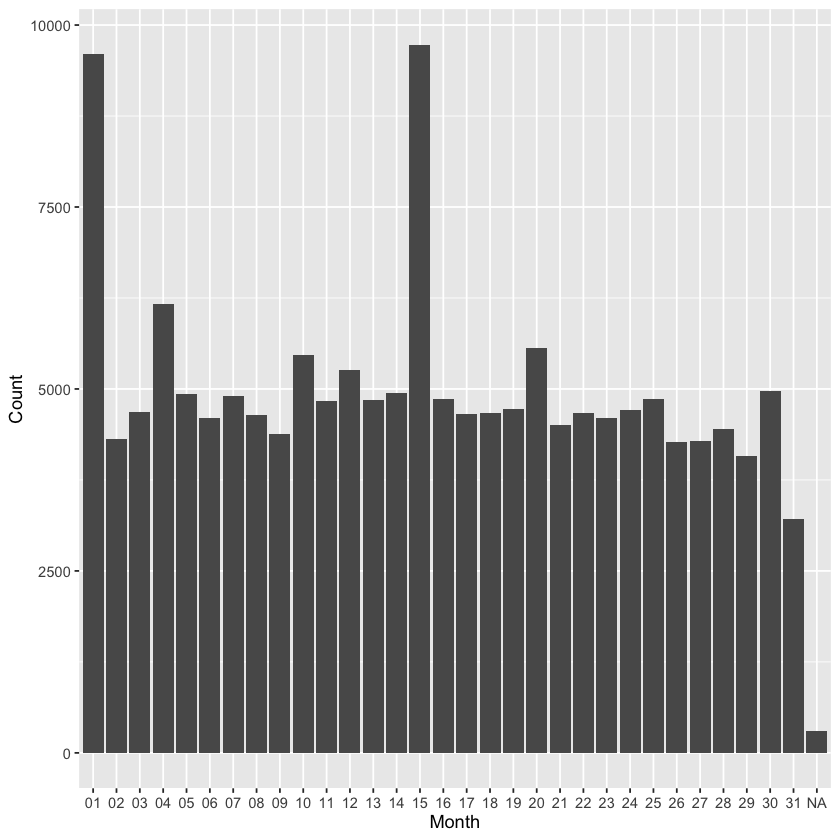

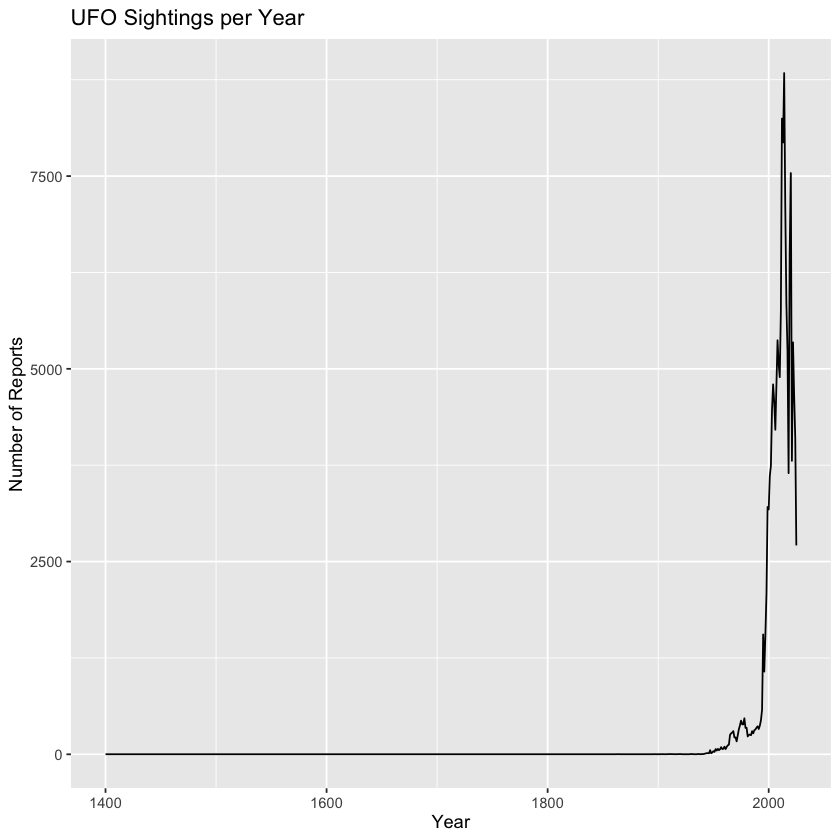

In [20]:
# Load UFO sightings data from a GitHub CSV
df <- read_csv("https://raw.githubusercontent.com/Vincent-Toups/bios512/refs/heads/main/nuforc_workshop/nuforc_sightings.csv")

# Read column names
names(df)

# Count the occurrences of each unique 'shape' value
unique_vals <- df$shape %>% table()

# Sort the counts of shapes in descending order and get the names
unique_vals %>% sort(decreasing = T) %>% names()

# Store column names in a vector
column_names <- names(df)

# Total number of rows in the dataset
n_total <- nrow(df)

# Loop over each column to get basic summary stats
for(col in column_names) {
  values <- df[[col]];        # Extract column
  n_na <- sum(is.na(values))  # Count number of NA values
    
  unique_vals <- values %>% table() %>% sort(decreasing = T)  # Count unique values and sort them by frequency
  n_unique <- length(unique_vals)
    
  cat(sprintf("%s:\n", col))  # Print column name
  cat(sprintf("\tnumber of NA values %d (%0.2f %%)\n", n_na, 100*n_na/n_total)) # Print number and percent of NA values
  if(n_unique < 150) cat(sprintf("\t\t%s\n", names(unique_vals) %>% paste(collapse=", "))) # If column has fewer than 150 unique values, print them all
  cat(sprintf("\tnumber of unique values %d (%0.2f %%)\n", length(unique_vals), # Print number and percent of unique values
    100*length(unique_vals)/n_total))
}

# Count number of reports per state and sort ascending
df %>% group_by(state) %>% tally() %>% arrange(n)

# Extract the 'occurred' column as a vector
df %>% pull(occurred)

# Helper function: nth(n) returns a function that extracts the nth element of a vector
nth <- function(n) function(a) a[n]

# Custom function to parse date strings by splitting on - / space : characters
parse_date <- function(s){
                          space_split <- s %>% str_split("[-/ :]")
                          tibble(d1 = Map(nth(1), space_split) %>% as.character(),
                                      d2 = Map(nth(2), space_split) %>% as.character(),
                                      d3 = Map(nth(3), space_split) %>% as.character(),
                                      d4 = Map(nth(4), space_split) %>% as.character(),
                                      d5 = Map(nth(5), space_split) %>% as.character())
                          }

# Apply the parsing function to the 'occurred' column
date_stuff <- parse_date(df %>% pull(occurred))
head(date_stuff, 10)

# Histogram of the second component of the split date (likely month)
ggplot (date_stuff, aes(d2))+ geom_bar() + labs(x = "Month", y = "Count")

# Install and load the skimr package for a nicer summary
library(skimr)

# Quick summary of the dataset
skim_output <- skimr::skim(df)

# Count occurrences for categorical columns
df %>% count(country, sort = TRUE)
df %>% count(state, sort = TRUE)
df %>% count(shape, sort = TRUE)

# Convert 'occurred' and 'reported' to proper date-time format using lubridate
df <- df %>%
  mutate(
  occurred = lubridate::mdy_hm(occurred, quiet = TRUE),
  reported = lubridate::mdy_hm(reported, quiet = TRUE)
  )

# Plot UFO sightings per year
df %>%
  filter(!is.na(occurred)) %>%
  count(year = lubridate::year(occurred)) %>%
  ggplot(aes(year, n)) +
  geom_line() +
    labs(title = "UFO Sightings per Year", x = "Year", y = "Number of Reports")

For the columns that have a low (relative to this dataset, which has ~150,000 observation) number of unique values, create a table that lists these unique values in ascending order.

In [21]:
#Answer to Question 7:

#arranging low count unique values in ascending order by count
df_unique <- as.data.frame(unique_vals)
colnames(df_unique) <- c("unique_value", "count")

filtered_unique_vals <- df_unique %>% 
                          filter(count < 150) %>% 
                            group_by(count) %>% 
                             arrange()

as_tibble(filtered_unique_vals)

#arranging ascending by name of unique_value
low_unique <- function(x, threshold) {
    unique_vals2 <- table(df[[col]])
  filtered_vals <- unique_vals2[unique_vals2 < threshold]
  cat("\n--- Unique values in Ascending Order ---\n")
    print(sort(names(filtered_vals)))
}

low_unique(unique_vals, 150)

unique_value,count
<fct>,<int>
Aircraft,148
Balloon,130
Chinese Lantern?,100
Chinese Lantern,85
Planet/Star?,84
Starlink?,82
Camera Anomaly,78
Searchlight,65
Meteor?,63



--- Unique values in Ascending Order ---
 [1] "Aircraft"              "Animal?"               "Aurora Borealis?"     
 [4] "Aurora?"               "Ball Lightning?"       "Balloon"              
 [7] "Balloons"              "Balloons?"             "Bat?"                 
[10] "Bird"                  "Bird?"                 "Birds"                
[13] "birds?"                "Birds?"                "Blimp"                
[16] "Blimp?"                "Boat?"                 "Boats"                
[19] "Boats?"                "Camera Anomaly"        "Camera Anomaly?"      
[22] "Chinese Lantern"       "Chinese Lantern?"      "Chinese Lanterns"     
[25] "Chinese Lanterns?"     "Cloud"                 "Cloud?"               
[28] "Comet"                 "Contrail"              "Contrail?"            
[31] "Debris?"               "Dream?"                "Drone"                
[34] "Drones?"               "Fireworks"             "Fireworks?"           
[37] "Flare?"                "Flar

## Question 8
Make a plot of number of UFO sightings by state (United States only). You can filter out states that only have one observation.

id,link_url,occurred,city,state,country,shape,summary,reported,has_image,explanation
<dbl>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
180616,https://nuforc.org/sighting/?id=180616,2024-02-27 21:00:00,NA,-,USA,Orb,Multiple orbs of light over the Pacific Ocean maneuvering in a purposeful way for over two hours,NA,NA,NA
178940,https://nuforc.org/sighting/?id=178940,2023-10-16 19:00:00,NA,-,USA,Cube,"Saw odd colors and geometric shapes from 30,000 feet in an airplane",NA,Y,NA
178369,https://nuforc.org/sighting/?id=178369,2023-09-19 02:39:00,Battle Mountain,-,USA,Orb,These balls of light would start appearing then would disappear.,NA,Y,NA
178275,https://nuforc.org/sighting/?id=178275,2023-09-13 21:22:00,Somerset,-,USA,Triangle,"Triangle shape, no sound, 100 ft above, red and white lights, approximately 50 by 100 ft long",NA,NA,NA
178298,https://nuforc.org/sighting/?id=178298,2023-09-12 16:15:00,Stockton,-,USA,Changing,"Recorded this afternoon, I’ve seen UAP also 2009 and when I was a kid",NA,Y,NA
177998,https://nuforc.org/sighting/?id=177998,2023-09-02 20:10:00,Antelope,-,USA,Light,Flashing lights floating up and disappeared in random order in sky.,NA,Y,NA
177627,https://nuforc.org/sighting/?id=177627,2023-08-16 00:46:00,Larue,-,USA,Triangle,Triangle objects,NA,NA,NA
177406,https://nuforc.org/sighting/?id=177406,2023-08-06 10:37:00,Palm Beach Gardens,-,USA,Fireball,"When i first saw it driving; BIG bright Red and moving really fast. 1 minute late it was super far, you could see streams coming off",NA,NA,NA
176477,https://nuforc.org/sighting/?id=176477,2023-06-25 00:00:00,Poole Town Centre,-,USA,Oval,I noticed two stars close together. One vanished and then this bowl shaped object appeared.,NA,NA,NA


id,link_url,occurred,city,state,country,shape,summary,reported,has_image,explanation
<dbl>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
143374,https://nuforc.org/sighting/?id=143374,2018-10-04 05:45:00,Largo,Fl,USA,Circle,"While looking at sky before sunrise, I saw a circular, steady light that resembled a bright star. It was stationary just above the tree",NA,NA,NA
1517,https://nuforc.org/sighting/?id=1517,1996-05-26 01:55:00,Fort Myers,Fl,USA,NA,"Woman driving home from shopping sees ""subdued white"" disc. Obj. suddenly ejects multi-colored sparks in a stream.",NA,NA,NA
1511,https://nuforc.org/sighting/?id=1511,1996-05-22 20:30:00,Venice,Fl,USA,NA,"Mother, 2 sons driving along wooded road, see huge silver disc. 50-60 yds. in diameter, ""pinkish streamers"" beside. Totally silent.",NA,NA,NA
1503,https://nuforc.org/sighting/?id=1503,1996-05-17 01:30:00,Miami,Fl,USA,NA,"Man sees aqua-green obj., with bright orange nose, streak vertically from the night sky. Light visible through clouds. Obj. dims out.",NA,NA,NA
1446,https://nuforc.org/sighting/?id=1446,1996-04-28 00:10:00,Fort Walton Beach,Fl,USA,NA,"Capt., 4x crew, witness VERY bright descend from sky to N, hover over water. Obj. moved from off bow to off stern, ascend vert!",NA,NA,NA


state,count
<chr>,<int>
CA,16905
FL,8711
WA,7506
TX,6548
NY,6223
PA,5288
AZ,5264
OH,4647
IL,4443


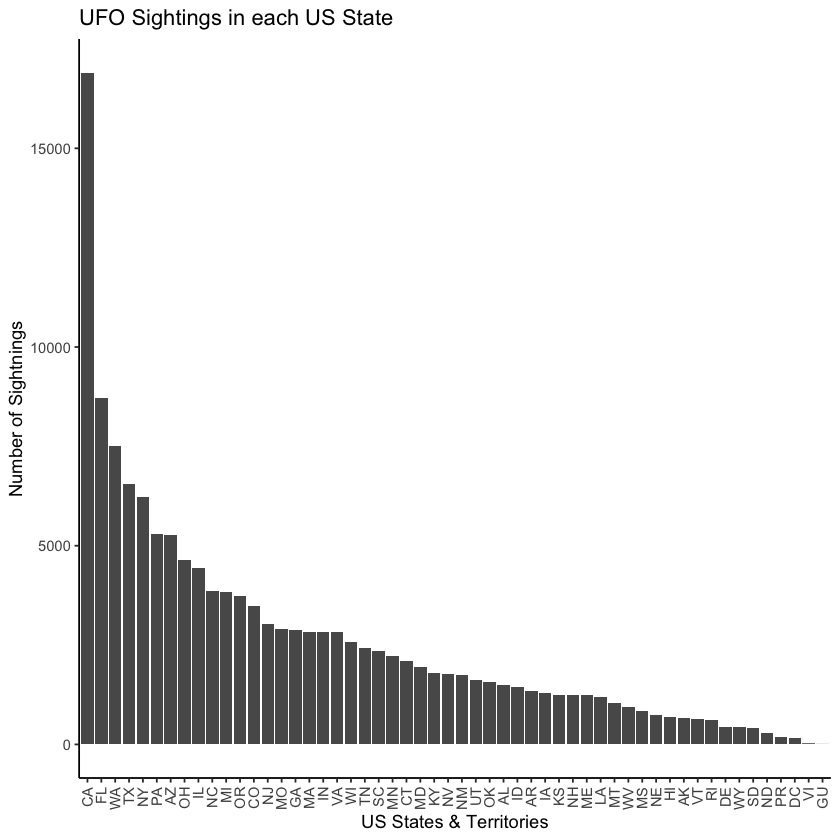

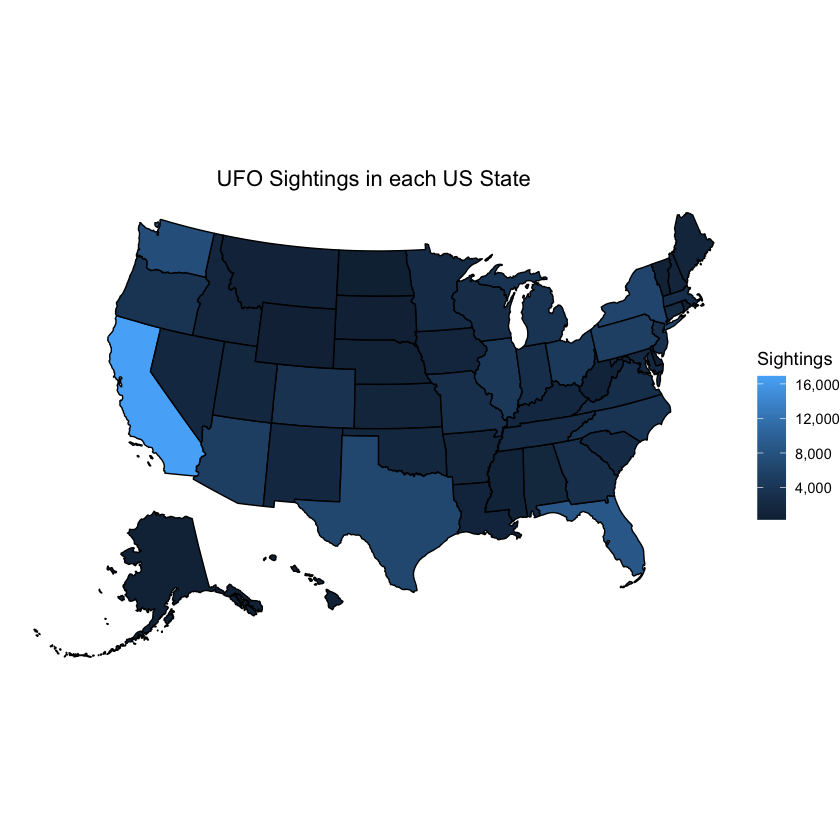

In [22]:
#filtering data to only USA
UFO_USA <- df %>% 
            filter(country == "USA") %>% 
            filter(state != "-") #filtering out state "-"

#checking missing
UFO_USA_Missing <- df %>% filter(state == "-")
UFO_USA_Missing

#noticing Fl and FL, checking cities
 df %>%  filter(state == "Fl") #cities match FL
 UFO_USA <- mutate_all(UFO_USA, .fun = toupper) #making all uppercase before count

#counting state sightings and limiting the data to each observation > 1
UFO_state_count <- UFO_USA %>% 
                      count(state, sort= T) %>% 
                          filter(n > 1) %>% 
                              arrange(desc(n)) %>% 
                                as.data.frame()

colnames(UFO_state_count) <- c("state", "count")

UFO_state_count

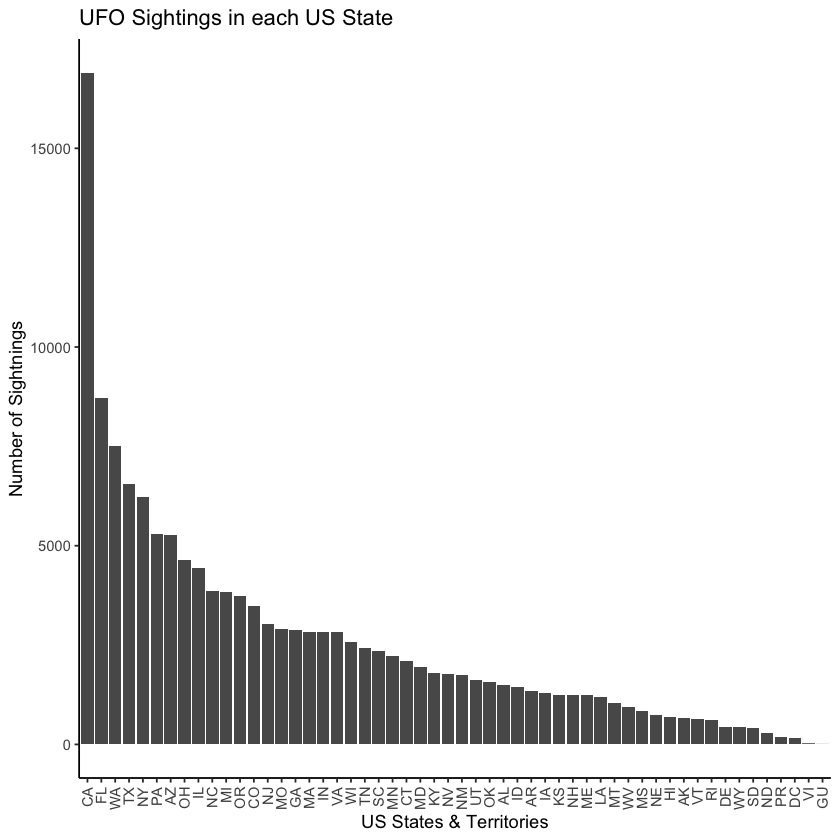

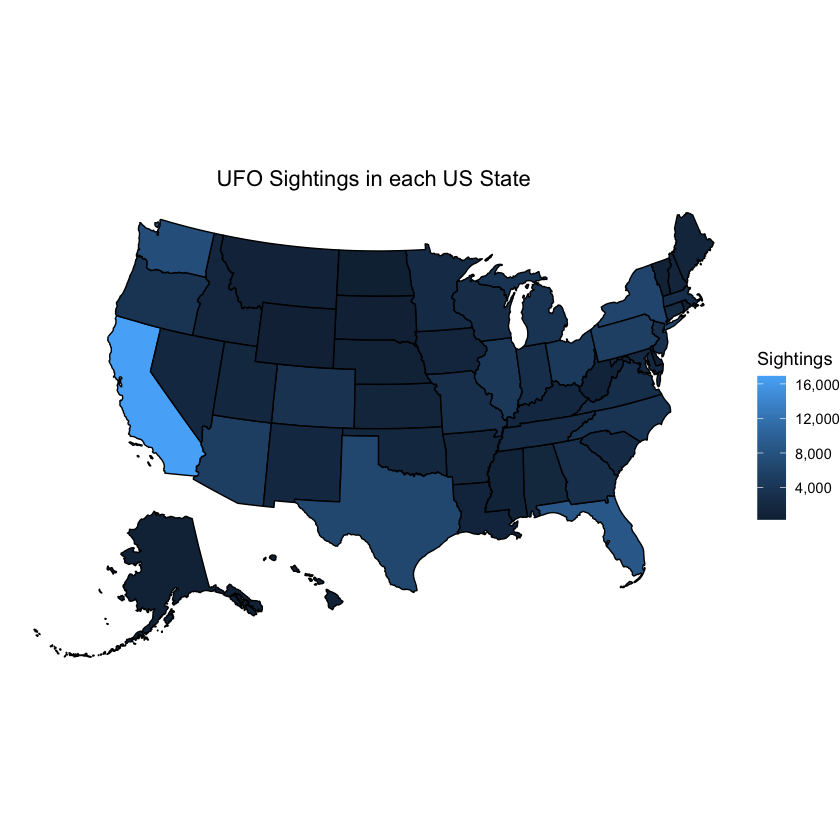

In [23]:

#plotting UFO Sighting in each State

ggplot(UFO_state_count, aes(reorder(state, -count), count)) +
  geom_bar(stat = "identity") + 
  theme_classic() +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5)) +
  labs(title = "UFO Sightings in each US State", y= "Number of Sightnings", x = "US States & Territories")

#plotting data on US map, excluding DC, PR, & US Territories

library(usmap)

UFO_state_count2 <- UFO_state_count %>%
  mutate(state = state.name[match(state, state.abb)])  #Converting "CA" to "California" for map data

#plotting US sightings on map
plot_usmap(data = UFO_state_count2, regions = "states", values = "count") +
  scale_fill_continuous(name = "Sightings", label = scales::comma) +
  theme_void() +
  labs(title = "UFO Sightings in each US State", ) +
  theme(plot.title = element_text(hjust = 0.5))